## Import Libraries

In [1]:
!pip install ydata-profiling
!pip install sweetviz


In [2]:
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px
#from google.colab import files

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [40]:
FootBallPlayers = pd.read_csv("final_data.csv")

In [5]:
FootBallPlayers.shape

(10754, 22)

In [6]:
FootBallPlayers.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [7]:
FootBallPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [ ]:
FootBallPlayers.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [ ]:
FootBallPlayers.describe(exclude='number')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [ ]:
profile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")
profile_FootBallPlayers.to_file("FootBallPlayers_report.html")
from google.colab import files
files.download('FootBallPlayers_report.html')
profile_FootBallPlayers

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vis_report_FootBallPlayers = sv.analyze(FootBallPlayers)
vis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"
from google.colab import files
files.download('vis_report_FootBallPlayers.html')
vis_report_FootBallPlayers.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# uniqeness
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [9]:
# uniqeness
FootBallPlayers.drop_duplicates(inplace=True)
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [10]:
# Completeness
FootBallPlayers.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [14]:
#Completeness
FootBallPlayers['name'].value_counts()

,count
name,
Paulinho,6
Vitinho,5
Guilherme,5
Fernando,4
João Pedro,4
...,...
Everson,1
Matheus Mendes,1
Gabriel Delfim,1


In [16]:
FootBallPlayers[FootBallPlayers['name'] =='Paulinho']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3259,/paulinho/profil/spieler/1083888,Clube de Regatas Vasco da Gama,Paulinho,Defender Right-Back,172.0,18.0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,500000,500000,2,1
3628,/paulinho/profil/spieler/428791,Clube Atlético Mineiro,Paulinho,Attack-LeftWinger,177.0,22.0,47,0.287540,0.107827,0.071885,...,0.0,0.0,2504,458,55,2,7500000,25000000,4,1
3786,/paulinho/profil/spieler/57229,Sport Club Corinthians Paulista,Paulinho,midfield-CentralMidfield,183.0,34.0,8,0.450000,0.000000,0.225000,...,0.0,0.0,400,276,57,15,1200000,40000000,3,0
4016,/paulinho/profil/spieler/85771,CS Marítimo,Paulinho,Defender Right-Back,176.0,31.0,49,0.047468,0.071203,0.213608,...,0.0,0.0,3792,21,2,1,300000,1500000,2,1
4276,/paulinho/profil/spieler/211072,Sporting CP,Paulinho,Attack Centre-Forward,187.0,30.0,84,0.431334,0.297471,0.267724,...,0.0,0.0,6051,199,36,7,8000000,15000000,4,0
9139,/paulinho/profil/spieler/534473,Al-Fayha FC,Paulinho,midfield-CentralMidfield,175.0,26.0,60,0.147996,0.092497,0.277492,...,0.0,0.0,4865,0,0,0,1000000,1600000,3,0


In [77]:
df=FootBallPlayers.copy()

In [78]:
df.shape

(10754, 22)

In [79]:

df['name']=df['name'] + '_' + df['team']
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea_Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland_Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton_Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez_Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane_Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons_Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi_Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair_Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford_Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [80]:
df['name'].value_counts()

,count
name,
David de Gea_Manchester United,1
Bongokuhle Hlongwane_Minnesota United FC,1
Joseph Rosales_Minnesota United FC,1
Robin Lod_Minnesota United FC,1
Emanuel Reynoso_Minnesota United FC,1
...,...
Kayque_Botafogo de Futebol e Regatas,1
Breno_Botafogo de Futebol e Regatas,1
Patrick de Paula_Botafogo de Futebol e Regatas,1


In [81]:
# Accurecy - types
df.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [21]:
# Accurecy - Outlier

categorical_features = ['player', 'team', 'name', 'position']

numeric_features = ['height', 'age', 'appearance', 'goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded','winger']

In [82]:
# Calculate the frequency of each 'current_value'
type_counts = df['current_value'].value_counts()


# Filter 'current_value' values that appear 2 or more times
df=df[df['highest_value'].isin(type_counts[type_counts >= 2].index)]


In [83]:
# Calculate the frequency of each 'highest_value'
type_counts = df['highest_value'].value_counts()


# Filter 'highest_value' values that appear 10 or more times
df=df[df['highest_value'].isin(type_counts[type_counts >= 2].index)]


In [84]:
# Calculate the frequency of each 'appearance'
type_counts = df['appearance'].value_counts()


# Filter 'appearance' values that appear 10 or more times
df=df[df['appearance'].isin(type_counts[type_counts >= 2].index)]


In [85]:
# Calculate the frequency of each 'minutes played'
type_counts = df['minutes played'].value_counts()


# Filter 'appearance' values that appear 10 or more times
df=df[df['minutes played'].isin(type_counts[type_counts >= 2].index)]


In [86]:
# Calculate the frequency of each 'award'
type_counts = df['award'].value_counts()


# Filter 'award' values that appear 10 or more times
df=df[df['award'].isin(type_counts[type_counts >= 2].index)]


In [87]:
# Calculate the frequency of each 'assists'
type_counts = df['assists'].value_counts()


# Filter 'assists' values that appear 10 or more times
df=df[df['assists'].isin(type_counts[type_counts >= 2].index)]


In [88]:
# Calculate the frequency of each 'assists'
type_counts = df['goals'].value_counts()


# Filter 'goals' values that appear 10 or more times
df=df[df['goals'].isin(type_counts[type_counts >= 2].index)]


In [89]:
# Calculate the frequency of each 'position_encoded'
type_counts = df['position_encoded'].value_counts()


# Filter 'position_encoded' values that appear 10 or more times
df=df[df['position_encoded'].isin(type_counts[type_counts >= 2].index)]


In [90]:
# Calculate the frequency of each 'days_injured'
type_counts = df['days_injured'].value_counts()


# Filter 'days_injured' values that appear 10 or more times
df=df[df['days_injured'].isin(type_counts[type_counts >= 2].index)]


In [91]:
# Calculate the frequency of each 'games_injured'
type_counts = df['games_injured'].value_counts()


# Filter 'games_injured' values that appear 10 or more times
df=df[df['games_injured'].isin(type_counts[type_counts >= 2].index)]


In [92]:
df.shape

(3742, 22)

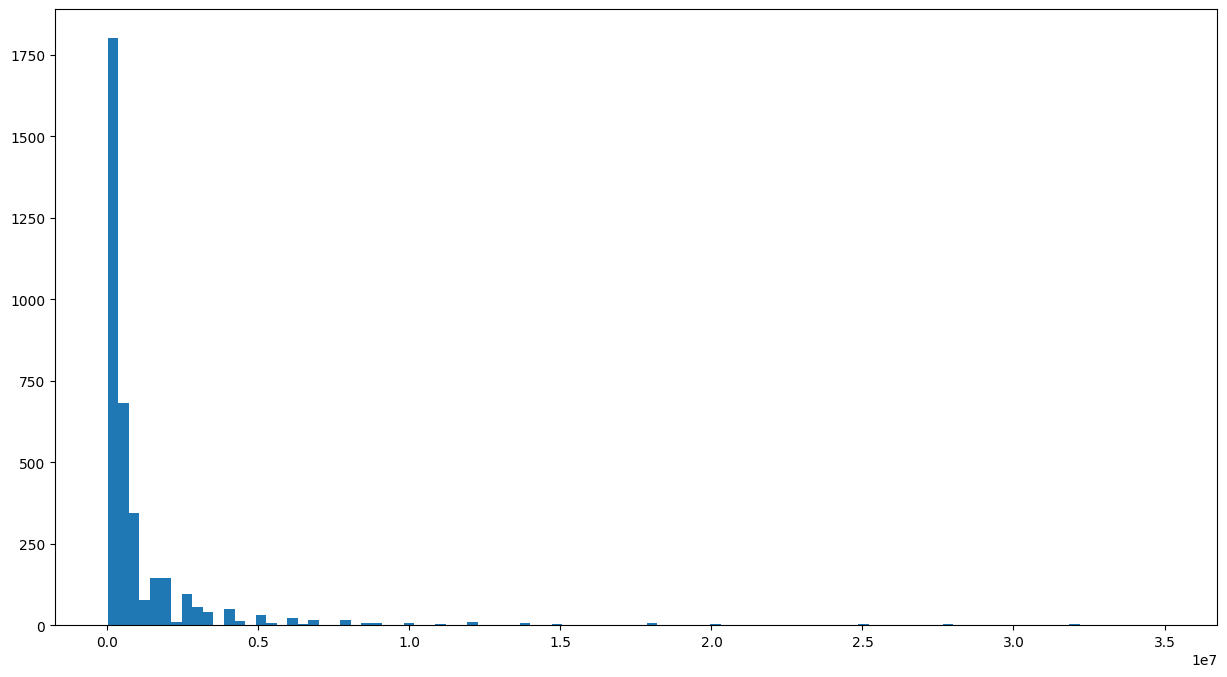

In [33]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['current_value']<=180000000) & (df['current_value']>0)]['current_value'], bins=100);


In [93]:

df=df[(df['current_value']<=180000000) & (df['current_value']>0)]

In [94]:
df.shape

(3613, 22)

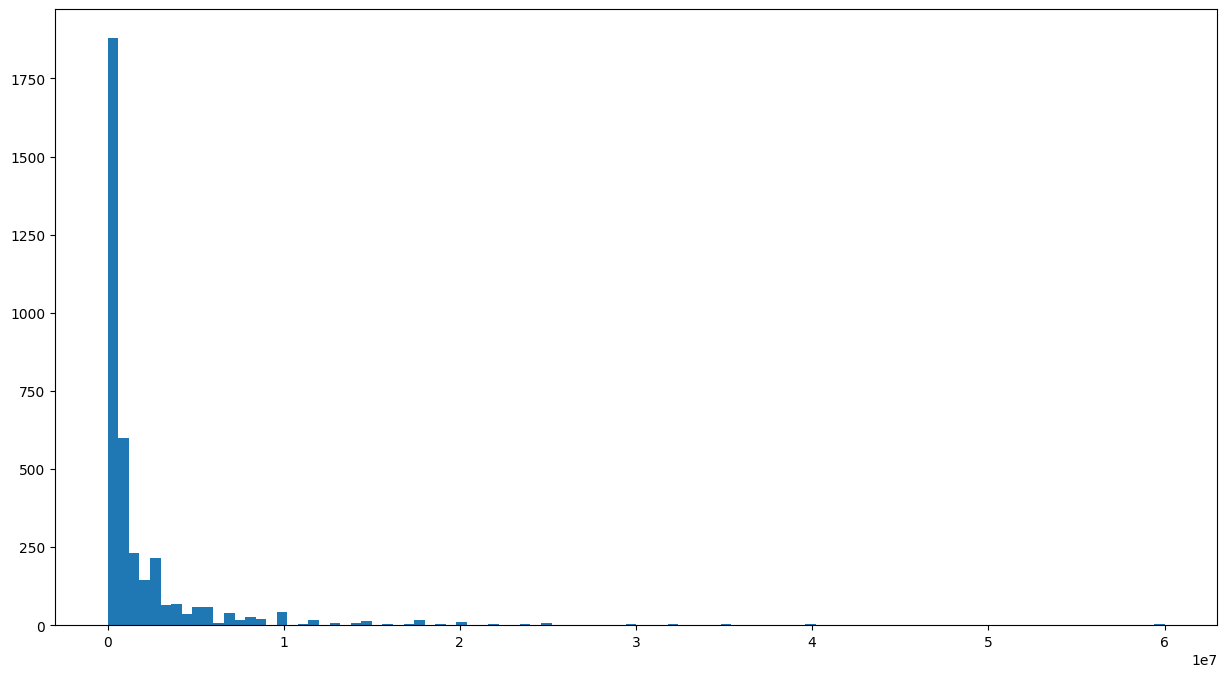

In [36]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['highest_value']<=200000000) & (df['highest_value']>0)]['highest_value'], bins=100);


In [95]:

df=df[(df['highest_value']<=200000000) & (df['highest_value']>0)]

In [96]:
df.shape

(3613, 22)

#### 3. Feature selection

In [97]:
position_encoded_values=df.groupby('position_encoded')['position'].agg(np.unique) # Use np.unique to refer to the function
print(position_encoded_values.to_dict())

{1: array(['Goalkeeper'], dtype=object), 2: array(['Defender', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back'], dtype=object), 3: array(['midfield', 'midfield-AttackingMidfield',
       'midfield-CentralMidfield', 'midfield-DefensiveMidfield',
       'midfield-LeftMidfield', 'midfield-RightMidfield'], dtype=object), 4: array(['Attack', 'Attack Centre-Forward', 'Attack-LeftWinger',
       'Attack-RightWinger', 'Attack-SecondStriker'], dtype=object)}


In [98]:

categorical_features = ['name']
numeric_features = ['appearance', 'goals','assists','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded']
df=df[categorical_features + numeric_features]

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [68]:
from sklearn.preprocessing import LabelEncoder

In [99]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'name' column
df['name_encoded'] = label_encoder.fit_transform(df['name'])

# Display the first few rows
df[['name', 'name_encoded']].head()

,name,name_encoded
2,Tom Heaton_Manchester United,3300
8,Teden Mengi_Manchester United,3227
11,Brandon Williams_Manchester United,413
54,Danny Ward_Leicester City,616
56,Alex Smithies_Leicester City,169


In [100]:
df.drop('name', axis=1, inplace=True)

In [ ]:
#scaler = StandardScaler()

In [101]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value       1.000000
highest_value       0.748960
minutes played      0.349057
appearance          0.345121
award               0.169587
games_injured       0.151447
days_injured        0.135236
goals               0.065773
assists             0.064321
position_encoded   -0.000428
name_encoded       -0.028317
Name: current_value, dtype: float64


In [102]:
# Set the correlation threshold
threshold = 0.02  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features.to_list()

['appearance',
 'goals',
 'assists',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'name_encoded']

In [ ]:
selected_features.size, type(selected_features)

In [103]:
df = df[selected_features]
df.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,name_encoded
2,4,0.0,0.000000,292,697,84,4,600000,6000000,3300
8,34,0.0,0.000000,2758,47,13,0,2000000,2000000,3227
11,34,0.0,0.033507,2686,175,28,1,10000000,12000000,413
54,33,0.0,0.000000,2970,127,29,2,8000000,10000000,616
56,31,0.0,0.000000,2790,89,14,0,600000,3500000,169


In [104]:
df.shape

(3613, 10)

In [ ]:
# one hot coding
#df = pd.get_dummies(df, columns=categorical_features)

#### 4. Prepare train and test data

In [105]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
X.shape

(3613, 9)

## Buliding the Model

In [111]:
model = LinearRegression()

In [112]:
ridge_model = Ridge()  # You can adjust alpha to see different results

In [113]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [114]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1)

## Train the Model

In [115]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [116]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [117]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-4.582855e+05
goals,8.795300e+04
assists,8.827697e+04
minutes played,6.675417e+05
days_injured,9.721575e+04
games_injured,-2.948961e+05
award,-3.343156e+05
highest_value,1.979322e+06
name_encoded,-3.247832e+04


In [118]:
print(model.intercept_)

1077420.4152249135


In [119]:
# Fit the Lasso model to the data
lasso_model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are your training data

# Now you can access the coef_ attribute
coeff_df = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-4.582624e+05
goals,8.795062e+04
assists,8.827482e+04
minutes played,6.675194e+05
days_injured,9.719997e+04
games_injured,-2.948805e+05
award,-3.343142e+05
highest_value,1.979320e+06
name_encoded,-3.247739e+04


## Evaluating the Model

1. Mean Square Error

In [120]:
y_base = [y_train.mean()] * len(y_test)

In [121]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 3779475802989.108


In [122]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 2187586546753.1707
Mean Squared Error for testing: 2549063955058.9414


2. Mean Absolute Error

In [123]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 1057270.4585373325


In [124]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 694252.9643890576
Mean Absolute Error for testing: 736582.5559215962


3. Root Mean Squared Error

In [125]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1028.2365771248037


In [127]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 1479049.203628186
Root Mean Squared Error for testing: 1596578.8283260372


4. R Square

In [128]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6288257449522332
R Square for testing: 0.3241159514416535


#### Predictions vs. Real Values

In [129]:
predictions = model.predict(X_test_scaled)
#predictions

In [130]:
Real_Values = np.array(y_test)
#Real_Values

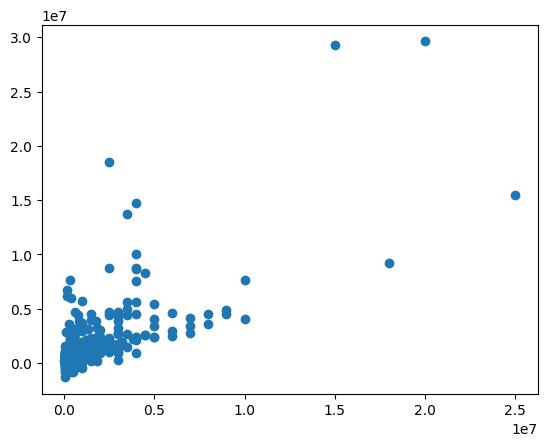

In [131]:
plt.scatter(Real_Values,predictions);

#### Residual Histogram

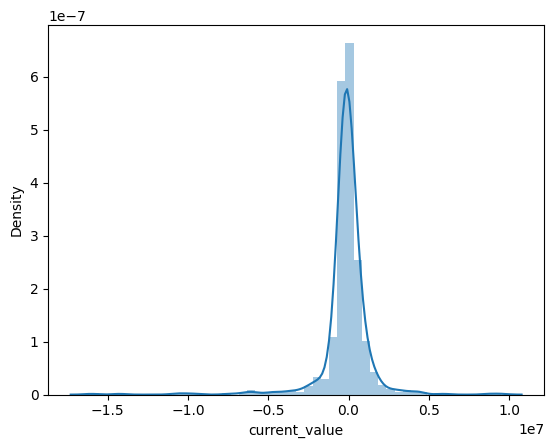

In [132]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution